In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

In [7]:
x_train, x_test = x_train/255.0, x_test/255.0 

In [8]:
y_train, y_test = x_train, x_test 

In [12]:
y_train.shape

(50000, 32, 32, 3)

In [13]:
model_train = models.Sequential([
    layers.GaussianNoise(0.1, input_shape=(32,32,3)), #gaussian
    layers.Conv2D(64,(3,3), activation='relu', padding='SAME'),
    layers.Conv2D(64,(3,3), activation='relu',  padding='SAME'),
    layers.Conv2D(64,(3,3), activation='relu', padding='SAME'),
    layers.Conv2D(3,(3,3), padding='SAME')

])

In [14]:
model_train.compile(optimizer ='adam', loss= tf.keras.losses.MeanSquaredError())

In [15]:
model_train.fit(x_train, y_train, epochs=100, batch_size=32)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.0028
Epoch 2/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0016
Epoch 3/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0016
Epoch 4/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 5/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 6/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 7/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 8/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 9/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 10/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0015
Epoch 11/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.0

In [16]:
model_train.save('./model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model1/assets


In [17]:
model_train.save_weights('./model1_weights')

In [21]:
image_data= []
test_image = Image.open('./noisy.png')

In [22]:
image_data.append(np.array(test_image))
image_data = np.array(image_data)

In [28]:
image_data = image_data / 255.0

In [25]:
model_test = models.Sequential([
    layers.Conv2D(64,(3,3), activation='relu', padding='SAME', input_shape=(512,512,3)),
    layers.Conv2D(64,(3,3), activation='relu',  padding='SAME'),
    layers.Conv2D(64,(3,3), activation='relu', padding='SAME'),
    layers.Conv2D(3,(3,3), padding='SAME')

])

In [26]:
model_test.load_weights('./model1_weights')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c527a58> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c522048>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c522048> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c5224a8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c5224a8> and <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f336c522908>).


In [29]:
model_test.predict(image_data)

array([[[[0.84418046, 0.49242786, 0.4840632 ],
         [0.8606496 , 0.5009925 , 0.5234619 ],
         [0.8319515 , 0.51808536, 0.54262435],
         ...,
         [0.8623883 , 0.49227652, 0.43477768],
         [0.8205847 , 0.43577087, 0.38710928],
         [0.77633685, 0.44494006, 0.4015746 ]],

        [[0.8793376 , 0.48706686, 0.48839915],
         [0.8812925 , 0.47877672, 0.5069738 ],
         [0.8619468 , 0.48520023, 0.5152283 ],
         ...,
         [0.909174  , 0.5129987 , 0.4676668 ],
         [0.887288  , 0.47652087, 0.44105673],
         [0.8479626 , 0.4762904 , 0.43185377]],

        [[0.85951847, 0.49551207, 0.48467946],
         [0.8757679 , 0.48059037, 0.5030433 ],
         [0.86749697, 0.47783935, 0.49709016],
         ...,
         [0.91357374, 0.5242009 , 0.47531307],
         [0.9048313 , 0.49538004, 0.45710915],
         [0.87905926, 0.48213995, 0.4316355 ]],

        ...,

        [[0.3727177 , 0.12877391, 0.2100269 ],
         [0.3775405 , 0.12238863, 0.22302829]

In [31]:
after = model_test.predict(image_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


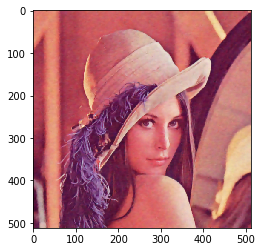

In [32]:
plt.imshow(np.squeeze(after))

In [33]:
squeezed = np.squeeze(after)*255.0

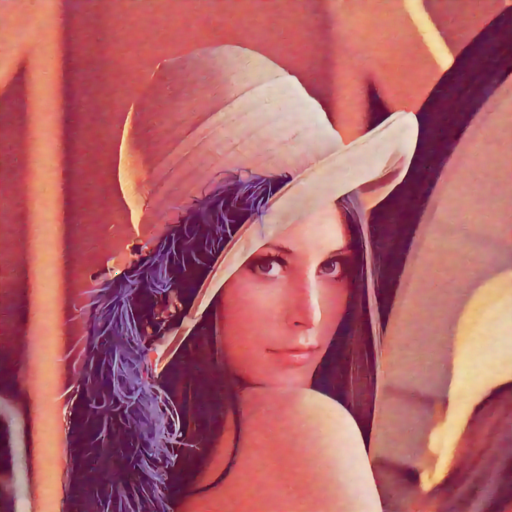

In [34]:
Image.fromarray(squeezed.astype('uint8'),'RGB')

In [35]:
output = Image.fromarray(squeezed.astype('uint8'),'RGB')

In [37]:
output.save('./Model1.png')